In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline 
sns.set(color_codes=True)
from sklearn import preprocessing

In [2]:
# loading the dataset and replacing -1 -1.0 and '-1' with nan values
df=pd.read_csv("D:\DataAnalyst.csv", na_values=[-1,-1.0,'-1'])
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,NaN
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",NaN
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,NaN


In [3]:
# finding the percentage of missing balues in each column
total= df['Job Title'].count().sum()
s2=df.isna().sum()
s2.name='total no. of missing values'
s1=(df.isna().sum())*100/total
s1.name='percentage'
pd.concat([s2,s1],axis=1)

,total no. of missing values,percentage
Unnamed: 0,0,0.000000
Job Title,0,0.000000
Salary Estimate,1,0.044385
Job Description,0,0.000000
Rating,272,12.072792
Company Name,1,0.044385
Location,0,0.000000
Headquarters,172,7.634265
Size,163,7.234798
Founded,660,29.294274


In [4]:
split1 = df['Company Name'].str.split("\n",expand = True)
df["Company Name"] = split1[0]
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,NaN
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",NaN
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,NaN


In [5]:
#convert salary estimate to min and max sal
sal_samp = df['Salary Estimate'].str.split("-" , expand = True)
df["Min_salary_USD_k"] = pd.to_numeric(sal_samp[0].str.extract('(\d+)' , expand = False))
df["Max_salary_USD_k"] = pd.to_numeric(sal_samp[1].str.extract('(\d+)' , expand = False))
# finding the average of min and max salary
df["Avg_salary_USD_k"] = (df["Max_salary_USD_k"] + df["Min_salary_USD_k"]) / 2
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Min_salary_USD_k,Max_salary_USD_k,Avg_salary_USD_k
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37.0,66.0,51.5
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,37.0,66.0,51.5
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,37.0,66.0,51.5
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,37.0,66.0,51.5
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37.0,66.0,51.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,NaN,78.0,104.0,91.0
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",NaN,78.0,104.0,91.0
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,104.0,91.0
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,NaN,78.0,104.0,91.0


In [6]:
# dropping competitors and easy apply because more than 50% of values are missing
# unnamed is a useless attribute
# we dont need Min_salary_USD_k','Max_salary_USD_k','Salary Estimate','Job Description' because we have average salray
df.drop(['Unnamed: 0', 'Competitors', 'Easy Apply','Min_salary_USD_k','Max_salary_USD_k','Salary Estimate','Job Description'], axis = 1, inplace = True)
df

,Job Title,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Avg_salary_USD_k
0,"Data Analyst, Center on Immigration and Justic...",3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),51.5
1,Quality Data Analyst,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),51.5
2,"Senior Data Analyst, Insights & Analytics Team...",3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,51.5
3,Data Analyst,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),51.5
4,Reporting Data Analyst,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),51.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,2.5,"Avacend, Inc.","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,91.0
2249,Senior Data Analyst (Corporate Audit),2.9,Arrow Electronics,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),91.0
2250,"Technical Business Analyst (SQL, Data analytic...",NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0
2251,"Data Analyst 3, Customer Experience",3.1,Contingent Network Services,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),91.0


In [7]:
#separating department from job title i.e cleaning the job titlecolumn
department = df['Job Title'].str.split(',', expand = True)
df['Job Title'], df['Department'] = department[0],department[1]
df

,Job Title,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Avg_salary_USD_k,Department
0,Data Analyst,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),51.5,Center on Immigration and Justice (CIJ)
1,Quality Data Analyst,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),51.5,None
2,Senior Data Analyst,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,51.5,Insights & Analytics Team [Customer Operations]
3,Data Analyst,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),51.5,None
4,Reporting Data Analyst,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),51.5,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,2.5,"Avacend, Inc.","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,91.0,None
2249,Senior Data Analyst (Corporate Audit),2.9,Arrow Electronics,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),91.0,None
2250,Technical Business Analyst (SQL,NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,Data analytics
2251,Data Analyst 3,3.1,Contingent Network Services,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),91.0,Customer Experience


In [8]:
#shall drop the department attribute as it has many missing values
df.drop('Department',1, inplace = True)
df

,Job Title,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Avg_salary_USD_k
0,Data Analyst,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),51.5
1,Quality Data Analyst,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),51.5
2,Senior Data Analyst,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,51.5
3,Data Analyst,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),51.5
4,Reporting Data Analyst,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),51.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,2.5,"Avacend, Inc.","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,91.0
2249,Senior Data Analyst (Corporate Audit),2.9,Arrow Electronics,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),91.0
2250,Technical Business Analyst (SQL,NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0
2251,Data Analyst 3,3.1,Contingent Network Services,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),91.0


In [9]:
# Revenue column is given different format so we should bring to a standard format
df['Revenue'].value_counts()


Unknown / Non-Applicable            615
$100 to $500 million (USD)          218
$50 to $100 million (USD)           199
$10+ billion (USD)                  189
$10 to $25 million (USD)            132
$2 to $5 billion (USD)              129
$1 to $5 million (USD)              111
$25 to $50 million (USD)            110
Less than $1 million (USD)           93
$1 to $2 billion (USD)               87
$500 million to $1 billion (USD)     79
$5 to $10 million (USD)              72
$5 to $10 billion (USD)              56
Name: Revenue, dtype: int64

In [10]:
# cleaning the revenue column
df['Revenue'] = df['Revenue'].replace('Unknown / Non-Applicable', None)
# df['Revenue']=df['Revenue'].replace('Unknown / Non-Applicable', None)
df['Revenue'] = df['Revenue'].str.replace('$', ' ')
df['Revenue'] = df['Revenue'].str.replace('(USD)', ' ')
df['Revenue'] = df['Revenue'].str.replace('(', ' ')
df['Revenue'] = df['Revenue'].str.replace(')', ' ')
df['Revenue'] = df['Revenue'].str.replace(' ', '')


df['Revenue'] = df['Revenue'].str.replace('2to5billion', '2billionto5billion')
df['Revenue'] = df['Revenue'].str.replace('5to10billion ', '5billionto10billion ')

df['Revenue'] = df['Revenue'].replace('million', ' ')
df['Revenue'] = df['Revenue'].replace('10+billion', '10billionto11billion')
df['Revenue'] = df['Revenue'].str.replace('Lessthan1million', '0millionto1million')

df['Revenue'] = df['Revenue'].str.replace('million', ' ')
df['Revenue'] = df['Revenue'].str.replace('billion', '000 ')

Revenue = df['Revenue'].str.split("to",expand=True)

In [11]:
print(Revenue[0].value_counts())
Revenue[1].value_counts()

100       305
50        277
1         270
10000     251
10        187
5         178
2000      167
25        155
0         128
500       107
Name: 0, dtype: int64


500       305
100       277
11000     251
25        187
5000      167
5         162
50        155
1         128
2000      108
1000      107
10         91
10000      87
Name: 1, dtype: int64

In [12]:
# creating the min and max revenue
df['Minimum Revenue'] = Revenue[0]
df['Maximum Revenue'] = Revenue[1]
df['Maximum Revenue'] = pd.to_numeric(df['Maximum Revenue'])
df['Minimum Revenue'] = pd.to_numeric(df['Minimum Revenue'])

# create avg of min and max
df["Avg_Revenue"] = (df["Maximum Revenue"] + df["Minimum Revenue"]) / 2

#drop revenue ,Minimum Revenue and Maximum Revenue
df.drop(['Maximum Revenue','Minimum Revenue','Revenue'], axis = 1, inplace = True)
df

,Job Title,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Avg_salary_USD_k,Avg_Revenue
0,Data Analyst,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,51.5,300.0
1,Quality Data Analyst,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,51.5,3500.0
2,Senior Data Analyst,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,51.5,3500.0
3,Data Analyst,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,51.5,75.0
4,Reporting Data Analyst,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",51.5,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,2.5,"Avacend, Inc.","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,91.0,37.5
2249,Senior Data Analyst (Corporate Audit),2.9,Arrow Electronics,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,91.0,10500.0
2250,Technical Business Analyst (SQL,NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,91.0,NaN
2251,Data Analyst 3,3.1,Contingent Network Services,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,91.0,37.5


In [13]:
# size atrribute is given in different formats so we will bring it to common format
df['Size'].value_counts()

51 to 200 employees        421
10000+ employees           375
1001 to 5000 employees     348
1 to 50 employees          347
201 to 500 employees       249
501 to 1000 employees      211
5001 to 10000 employees     97
Unknown                     42
Name: Size, dtype: int64

In [14]:
# cleaning of size column
df['Size'] = df['Size'].str.replace('employees', '')

df['Size'] = df['Size'].str.replace('+', 'plus')
df['Size'] = df['Size'].replace('Unknown', None)

df['Size'] = df['Size'].str.replace('10000plus', '10000 to 10001')

size = df['Size'].str.split("to",expand=True)


#Creating separate columns of Size as minimum and maximum size.

df['Minimum Size'] = size[0]
df['Maximum Size'] = size[1]

df.drop('Size',1,inplace = True)
df
#df['Minimum Size'].astype(int,skipna=True)
#df['Maximum Size'].astype(int,skipna=True)
#df["Avg_Size"] = (df["Minimum Size"] + df['Maximum Size']) / 2
#df.drop(['Minimum Size','Maximum Size'],1,inplace = True)

,Job Title,Rating,Company Name,Location,Headquarters,Founded,Type of ownership,Industry,Sector,Avg_salary_USD_k,Avg_Revenue,Minimum Size,Maximum Size
0,Data Analyst,3.2,Vera Institute of Justice,"New York, NY","New York, NY",1961.0,Nonprofit Organization,Social Assistance,Non-Profit,51.5,300.0,201,500
1,Quality Data Analyst,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,51.5,3500.0,10000,10001
2,Senior Data Analyst,3.4,Squarespace,"New York, NY","New York, NY",2003.0,Company - Private,Internet,Information Technology,51.5,3500.0,1001,5000
3,Data Analyst,4.1,Celerity,"New York, NY","McLean, VA",2002.0,Subsidiary or Business Segment,IT Services,Information Technology,51.5,75.0,201,500
4,Reporting Data Analyst,3.9,FanDuel,"New York, NY","New York, NY",2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",51.5,300.0,501,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,2.5,"Avacend, Inc.","Denver, CO","Alpharetta, GA",NaN,Company - Private,Staffing & Outsourcing,Business Services,91.0,37.5,51,200
2249,Senior Data Analyst (Corporate Audit),2.9,Arrow Electronics,"Centennial, CO","Centennial, CO",1935.0,Company - Public,Wholesale,Business Services,91.0,10500.0,10000,10001
2250,Technical Business Analyst (SQL,NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,91.0,NaN,NaN,NaN
2251,Data Analyst 3,3.1,Contingent Network Services,"Centennial, CO","West Chester, OH",1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,91.0,37.5,201,500


In [15]:
df['Maximum Size'] = df['Maximum Size'].fillna(method='ffill')
df['Minimum Size'] = df['Minimum Size'].fillna(method='bfill')
df['Industry'] = df['Industry'].fillna(method='bfill')
df['Sector'] = df['Sector'].fillna(method='ffill')
df['Type of ownership'] = df['Type of ownership'].fillna(method='ffill')
df['Headquarters'] = df['Headquarters'].fillna(method='ffill')
df['Company Name'] = df['Company Name'].fillna(method='ffill')


In [16]:
#'Unnamed: 0', 'Competitors', 'Easy Apply','Min_salary_USD_k','Max_salary_USD_k','Salary Estimate','Job Description'
#are dropped because its useless
#easy apply and competitors have more than 50%null values
# these all are the columns of type float and has been replaced with mean 
df['Rating'].fillna(df['Rating'].mean(),inplace=True)
df['Founded'].fillna(int(df['Founded'].mean()),inplace=True)
df['Avg_salary_USD_k'].fillna(int(df['Avg_salary_USD_k'].mean()),inplace=True)
df['Avg_Revenue'].fillna(int(df['Avg_Revenue'].mean()),inplace=True)

In [17]:
df.isna().sum()

Job Title            0
Rating               0
Company Name         0
Location             0
Headquarters         0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Avg_salary_USD_k     0
Avg_Revenue          0
Minimum Size         0
Maximum Size         0
dtype: int64

In [18]:
df

,Job Title,Rating,Company Name,Location,Headquarters,Founded,Type of ownership,Industry,Sector,Avg_salary_USD_k,Avg_Revenue,Minimum Size,Maximum Size
0,Data Analyst,3.200000,Vera Institute of Justice,"New York, NY","New York, NY",1961.0,Nonprofit Organization,Social Assistance,Non-Profit,51.5,300.0,201,500
1,Quality Data Analyst,3.800000,Visiting Nurse Service of New York,"New York, NY","New York, NY",1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,51.5,3500.0,10000,10001
2,Senior Data Analyst,3.400000,Squarespace,"New York, NY","New York, NY",2003.0,Company - Private,Internet,Information Technology,51.5,3500.0,1001,5000
3,Data Analyst,4.100000,Celerity,"New York, NY","McLean, VA",2002.0,Subsidiary or Business Segment,IT Services,Information Technology,51.5,75.0,201,500
4,Reporting Data Analyst,3.900000,FanDuel,"New York, NY","New York, NY",2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",51.5,300.0,501,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,2.500000,"Avacend, Inc.","Denver, CO","Alpharetta, GA",1978.0,Company - Private,Staffing & Outsourcing,Business Services,91.0,37.5,51,200
2249,Senior Data Analyst (Corporate Audit),2.900000,Arrow Electronics,"Centennial, CO","Centennial, CO",1935.0,Company - Public,Wholesale,Business Services,91.0,10500.0,10000,10001
2250,Technical Business Analyst (SQL,3.731903,Spiceorb,"Denver, CO","Centennial, CO",1978.0,Company - Public,Enterprise Software & Network Solutions,Business Services,91.0,1958.0,201,10001
2251,Data Analyst 3,3.100000,Contingent Network Services,"Centennial, CO","West Chester, OH",1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,91.0,37.5,201,500


# Removing Outliers

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3.subtract(Q1)
print(IQR)
print(df.shape)

Rating                 0.6
Founded               24.0
Avg_salary_USD_k      22.5
Avg_Revenue         1940.5
dtype: float64
(2253, 13)


In [20]:
df = df[~((df < (Q1.subtract(1.5*IQR))) | (df > (Q3 + 1.5*IQR))).any(axis=1)]
df.shape

(1538, 13)

In [21]:
df

,Job Title,Rating,Company Name,Location,Headquarters,Founded,Type of ownership,Industry,Sector,Avg_salary_USD_k,Avg_Revenue,Minimum Size,Maximum Size
0,Data Analyst,3.200000,Vera Institute of Justice,"New York, NY","New York, NY",1961.0,Nonprofit Organization,Social Assistance,Non-Profit,51.5,300.0,201,500
2,Senior Data Analyst,3.400000,Squarespace,"New York, NY","New York, NY",2003.0,Company - Private,Internet,Information Technology,51.5,3500.0,1001,5000
3,Data Analyst,4.100000,Celerity,"New York, NY","McLean, VA",2002.0,Subsidiary or Business Segment,IT Services,Information Technology,51.5,75.0,201,500
4,Reporting Data Analyst,3.900000,FanDuel,"New York, NY","New York, NY",2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",51.5,300.0,501,1000
5,Data Analyst,3.900000,Point72,"New York, NY","Stamford, CT",2014.0,Company - Private,Investment Banking & Asset Management,Finance,51.5,300.0,1001,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246,Technical Business Analyst (SQL,3.731903,Spiceorb,"Denver, CO","Ashburn, VA",1978.0,Company - Private,Computer Hardware & Software,Business Services,91.0,1958.0,51,5000
2247,Marketing/Communications - Data Analyst-Marketing,4.100000,APN Software Services Inc.,"Broomfield, CO","Newark, CA",1978.0,Company - Private,Computer Hardware & Software,Information Technology,91.0,37.5,51,200
2248,RQS - IHHA - 201900004460 -1q Data Security An...,2.500000,"Avacend, Inc.","Denver, CO","Alpharetta, GA",1978.0,Company - Private,Staffing & Outsourcing,Business Services,91.0,37.5,51,200
2250,Technical Business Analyst (SQL,3.731903,Spiceorb,"Denver, CO","Centennial, CO",1978.0,Company - Public,Enterprise Software & Network Solutions,Business Services,91.0,1958.0,201,10001


### Mean and Variance of each column

In [22]:
mean_var_cols=["Rating","Founded","Avg_salary_USD_k","Avg_Revenue"]
cols_mean={}
cols_var={}
for i in mean_var_cols:
  cols_mean[i]=df[i].mean()
  cols_var[i]=df[i].var()

In [23]:
print(cols_mean)
print(cols_var)

{'Rating': 3.7083123220661514, 'Founded': 1988.9577373211964, 'Avg_salary_USD_k': 68.55169050715214, 'Avg_Revenue': 688.9131989596879}
{'Rating': 0.24901891810795848, 'Founded': 260.2773278632887, 'Avg_salary_USD_k': 329.76879674995473, 'Avg_Revenue': 1058638.2320507807}


# Normalization

Normalization is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.

Various normalization techniques exist such as Min-Max Scalar and Robust Scalar. We will be using Min-Max Scalar because we have already removed outliers from our dataset.

# Standardization

Standardization is useful when the data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis. It helps in multivariate analysis when you want all the variables to be in comparative units.

The result of standardization is that the features/variables will be rescaled so that they have the properties of a standard normal distribution with μ=0 and σ=1.



In the dataset, Avg_salary_USD_k and Avg_Revenue have been expressed in dollars (unit of currency), Size is expressed in terms of number of employees , Foundation of the company is expressed in years and rating has no unit. They can be brought to a standard scale with the help of standarsization and normalization with which we can  make meaningful comparision between them.

# Min - Max Scalar

$ Xnorm = (X - Xmin)/(Xmax - Xmin) $

# Z - Score Normalization

$ 𝑧=(𝑥−μ)/σ $

where: z is z-score
   x is the data
   μ is the mean
   σ is the standard deviation

In [24]:
# Selecting only the numeric attributes for z-score normalization
num_attr = df.select_dtypes(include=['float64'])
num_attr

,Rating,Founded,Avg_salary_USD_k,Avg_Revenue
0,3.200000,1961.0,51.5,300.0
2,3.400000,2003.0,51.5,3500.0
3,4.100000,2002.0,51.5,75.0
4,3.900000,2009.0,51.5,300.0
5,3.900000,2014.0,51.5,300.0
...,...,...,...,...
2246,3.731903,1978.0,91.0,1958.0
2247,4.100000,1978.0,91.0,37.5
2248,2.500000,1978.0,91.0,37.5
2250,3.731903,1978.0,91.0,1958.0


In [25]:
std_scale = preprocessing.StandardScaler().fit(num_attr)
std_df = std_scale.transform(num_attr)
minmax_scale = preprocessing.MinMaxScaler().fit(std_df)
minmax_df = minmax_scale.transform(std_df)
minmax_df

array([[0.29166667, 0.22666667, 0.22641509, 0.08558365],
       [0.375     , 0.78666667, 0.22641509, 1.        ],
       [0.66666667, 0.77333333, 0.22641509, 0.02128876],
       ...,
       [0.        , 0.45333333, 0.72327044, 0.01057294],
       [0.51329295, 0.45333333, 0.72327044, 0.55936562],
       [0.25      , 0.53333333, 0.72327044, 0.01057294]])

In [26]:
print("Dataset After standardization:\n")
print("Means:", std_df.mean(axis=0), end="\n\n")
print("Standard deviations:", std_df.std(axis=0), end="\n\n")
print("Min values:", std_df.min(axis=0), end="\n\n")
print("Max values:", std_df.max(axis=0), end="\n\n")

Dataset After standardization:

Means: [-3.76522971e-16 -3.70979075e-15  3.23393963e-17  3.75367993e-17]

Standard deviations: [1. 1. 1. 1.]

Min values: [-2.42216803 -2.78758109 -1.93083616 -0.66929354]

Max values: [2.38884247 1.86275485 2.44845261 2.73301303]



In [27]:
print("Dataset After normalisation:\n")
print("Means:", minmax_df.mean(axis=0), end="\n\n")
print("Standard deviations:", minmax_df.std(axis=0), end="\n\n")
print("Min values:", minmax_df.min(axis=0), end="\n\n")
print("Max values:", minmax_df.max(axis=0), end="\n\n")

Dataset After normalisation:

Means: [0.50346347 0.5994365  0.44090177 0.19671759]

Standard deviations: [0.20785654 0.21503823 0.22834758 0.29391825]

Min values: [0. 0. 0. 0.]

Max values: [1. 1. 1. 1.]



In [28]:
minmax_df = pd.DataFrame(minmax_df, columns=["Rating","Founded","Avg_salary_USD_k","Avg_Revenue"])
minmax_df

,Rating,Founded,Avg_salary_USD_k,Avg_Revenue
0,0.291667,0.226667,0.226415,0.085584
1,0.375000,0.786667,0.226415,1.000000
2,0.666667,0.773333,0.226415,0.021289
3,0.583333,0.866667,0.226415,0.085584
4,0.583333,0.933333,0.226415,0.085584
...,...,...,...,...
1533,0.513293,0.453333,0.723270,0.559366
1534,0.666667,0.453333,0.723270,0.010573
1535,0.000000,0.453333,0.723270,0.010573
1536,0.513293,0.453333,0.723270,0.559366


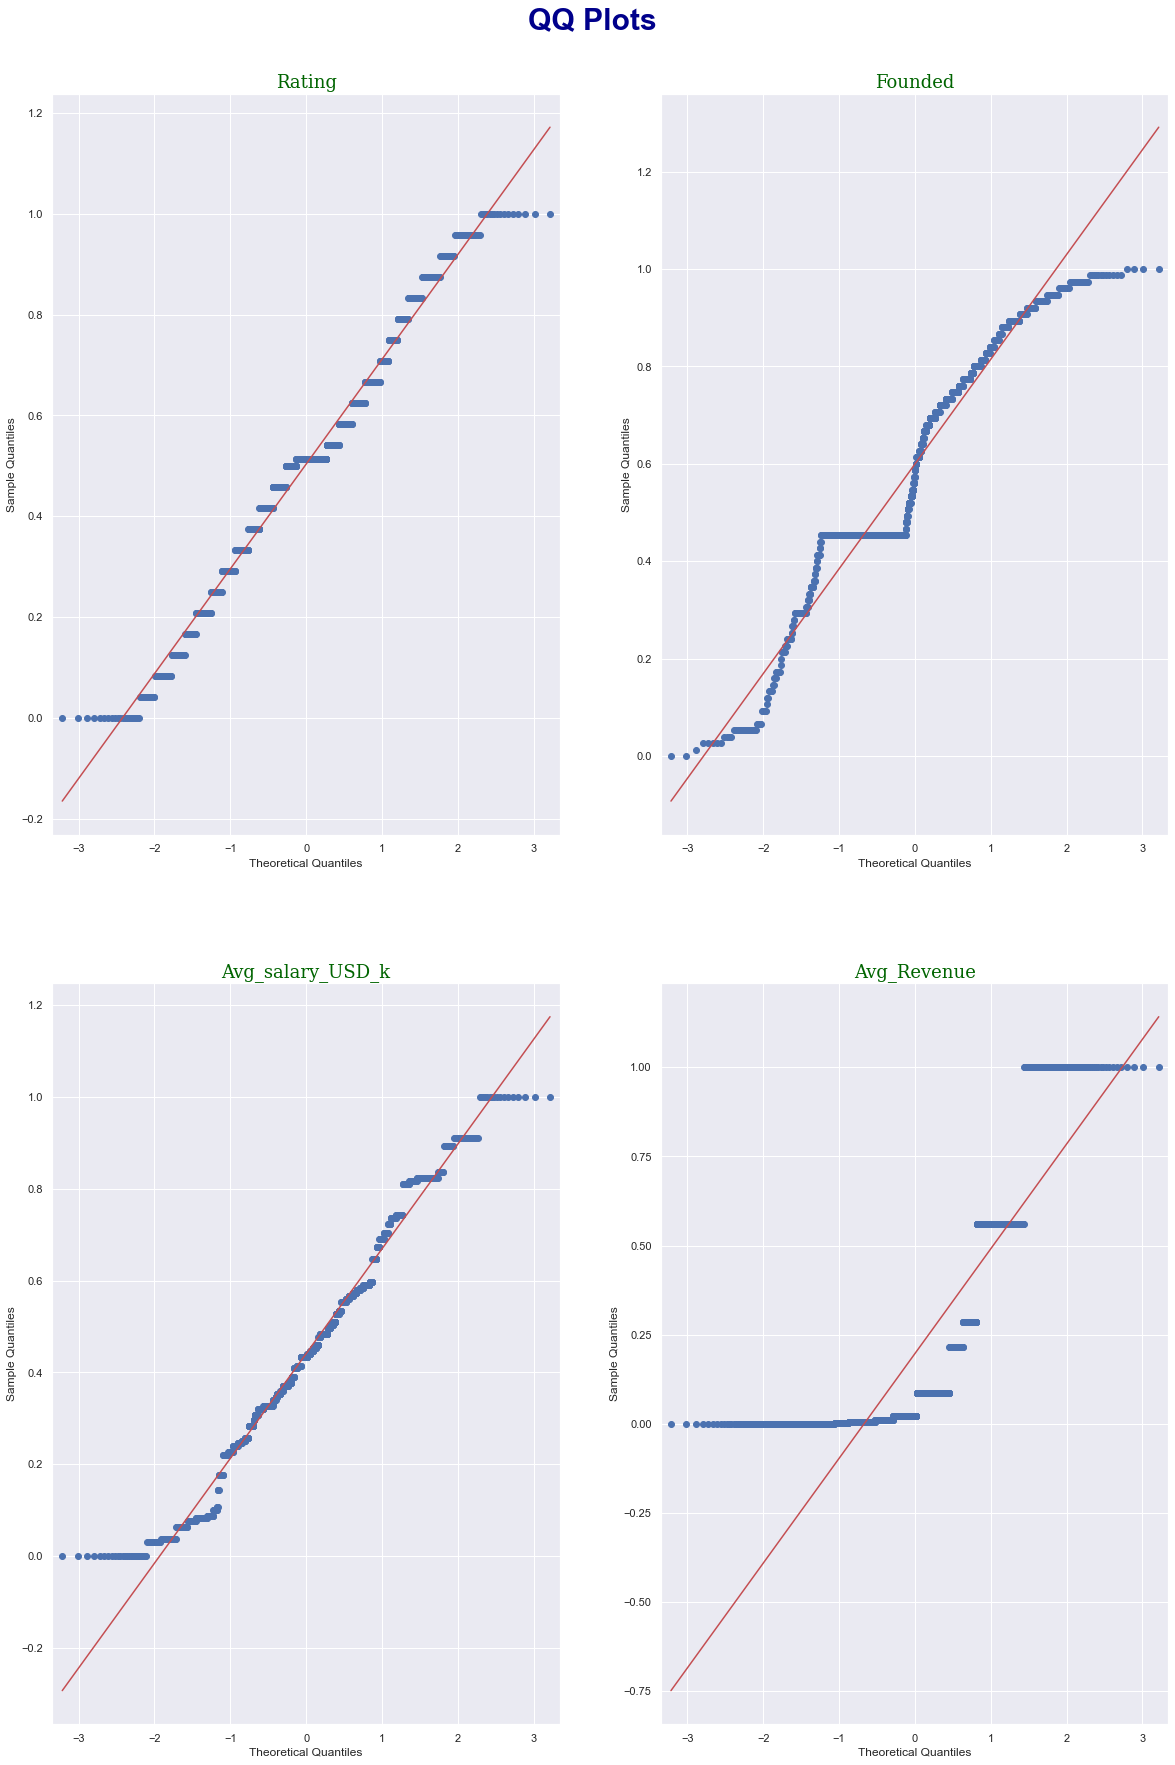

In [29]:
font = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 18,
        }

fig, ax = plt.subplots(2, 2, figsize=(20, 30))
plt.suptitle("QQ Plots", x=0.5, y=0.92, size=30, weight="bold", color="darkblue")

qqplot(minmax_df["Rating"], line='s', ax=ax[0][0])
ax[0][0].set_title("Rating", fontdict=font)

qqplot(minmax_df["Founded"], line='s', ax=ax[0][1])
ax[0][1].set_title("Founded", fontdict=font)

qqplot(minmax_df["Avg_salary_USD_k"], line='s', ax=ax[1][0])
ax[1][0].set_title("Avg_salary_USD_k", fontdict=font)

qqplot(minmax_df["Avg_Revenue"], line='s', ax=ax[1][1])
ax[1][1].set_title("Avg_Revenue", fontdict=font)

plt.show()

From the qq plots above, we can infer that none of the variables have a normal distribution. Few of the variables show distributions very close to the straight line. However, they deviate near the tail which might indicate that the distribution is not normal.

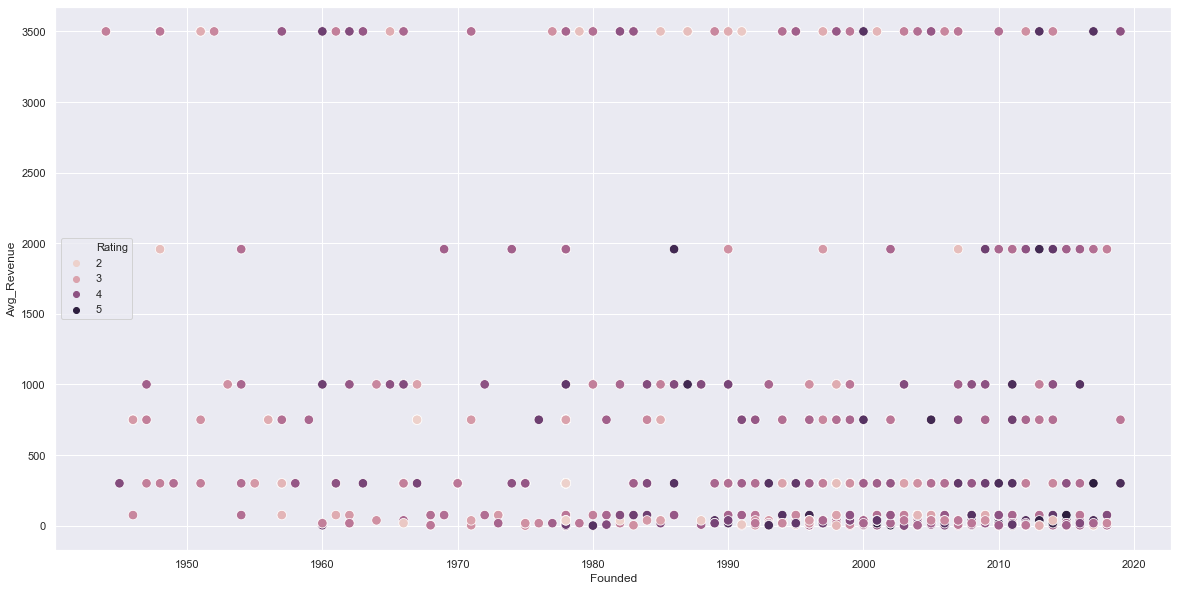

In [30]:
#scatter plot of year founded vs average revenue
sns.set_style('white')
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(x='Founded',y='Avg_Revenue',hue='Rating',s=90,data=df)

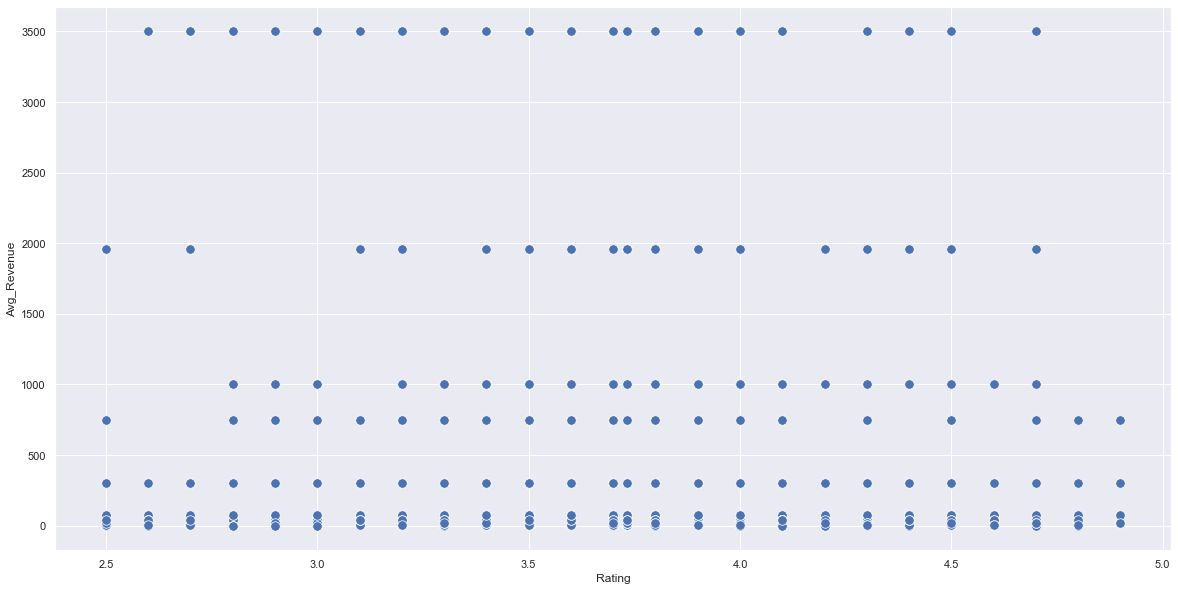

In [31]:
#scatter plot of ratings of companies vs average revenue
sns.set_style('ticks')
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(x='Rating',y='Avg_Revenue',s=90,data=df)

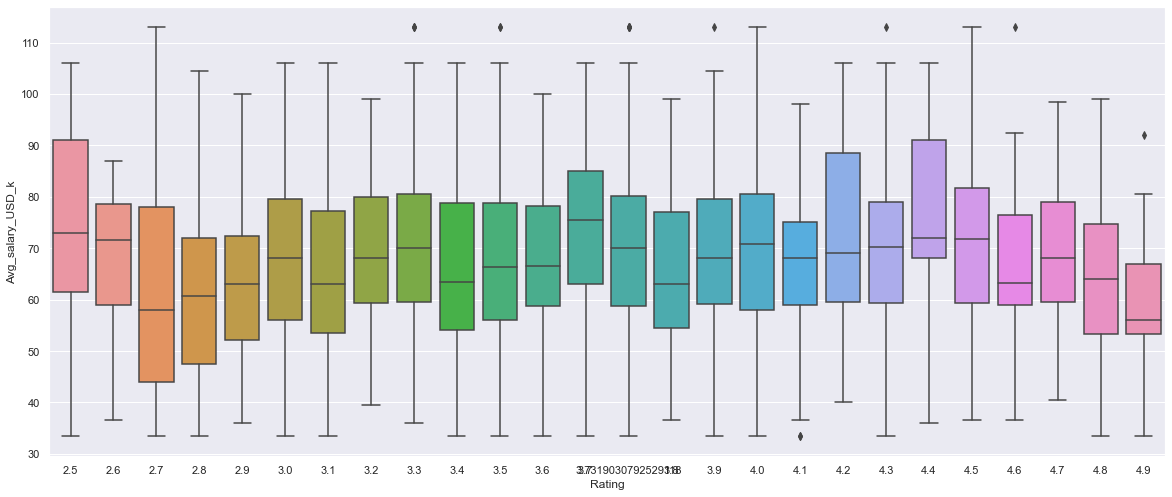

In [32]:
#box plot of ratings of company vs average salary of employees
sns.set(style = 'whitegrid')  
sns.set(rc={'figure.figsize':(20,8.27)})
sns.boxplot(x ="Rating",y ="Avg_salary_USD_k",data =df)

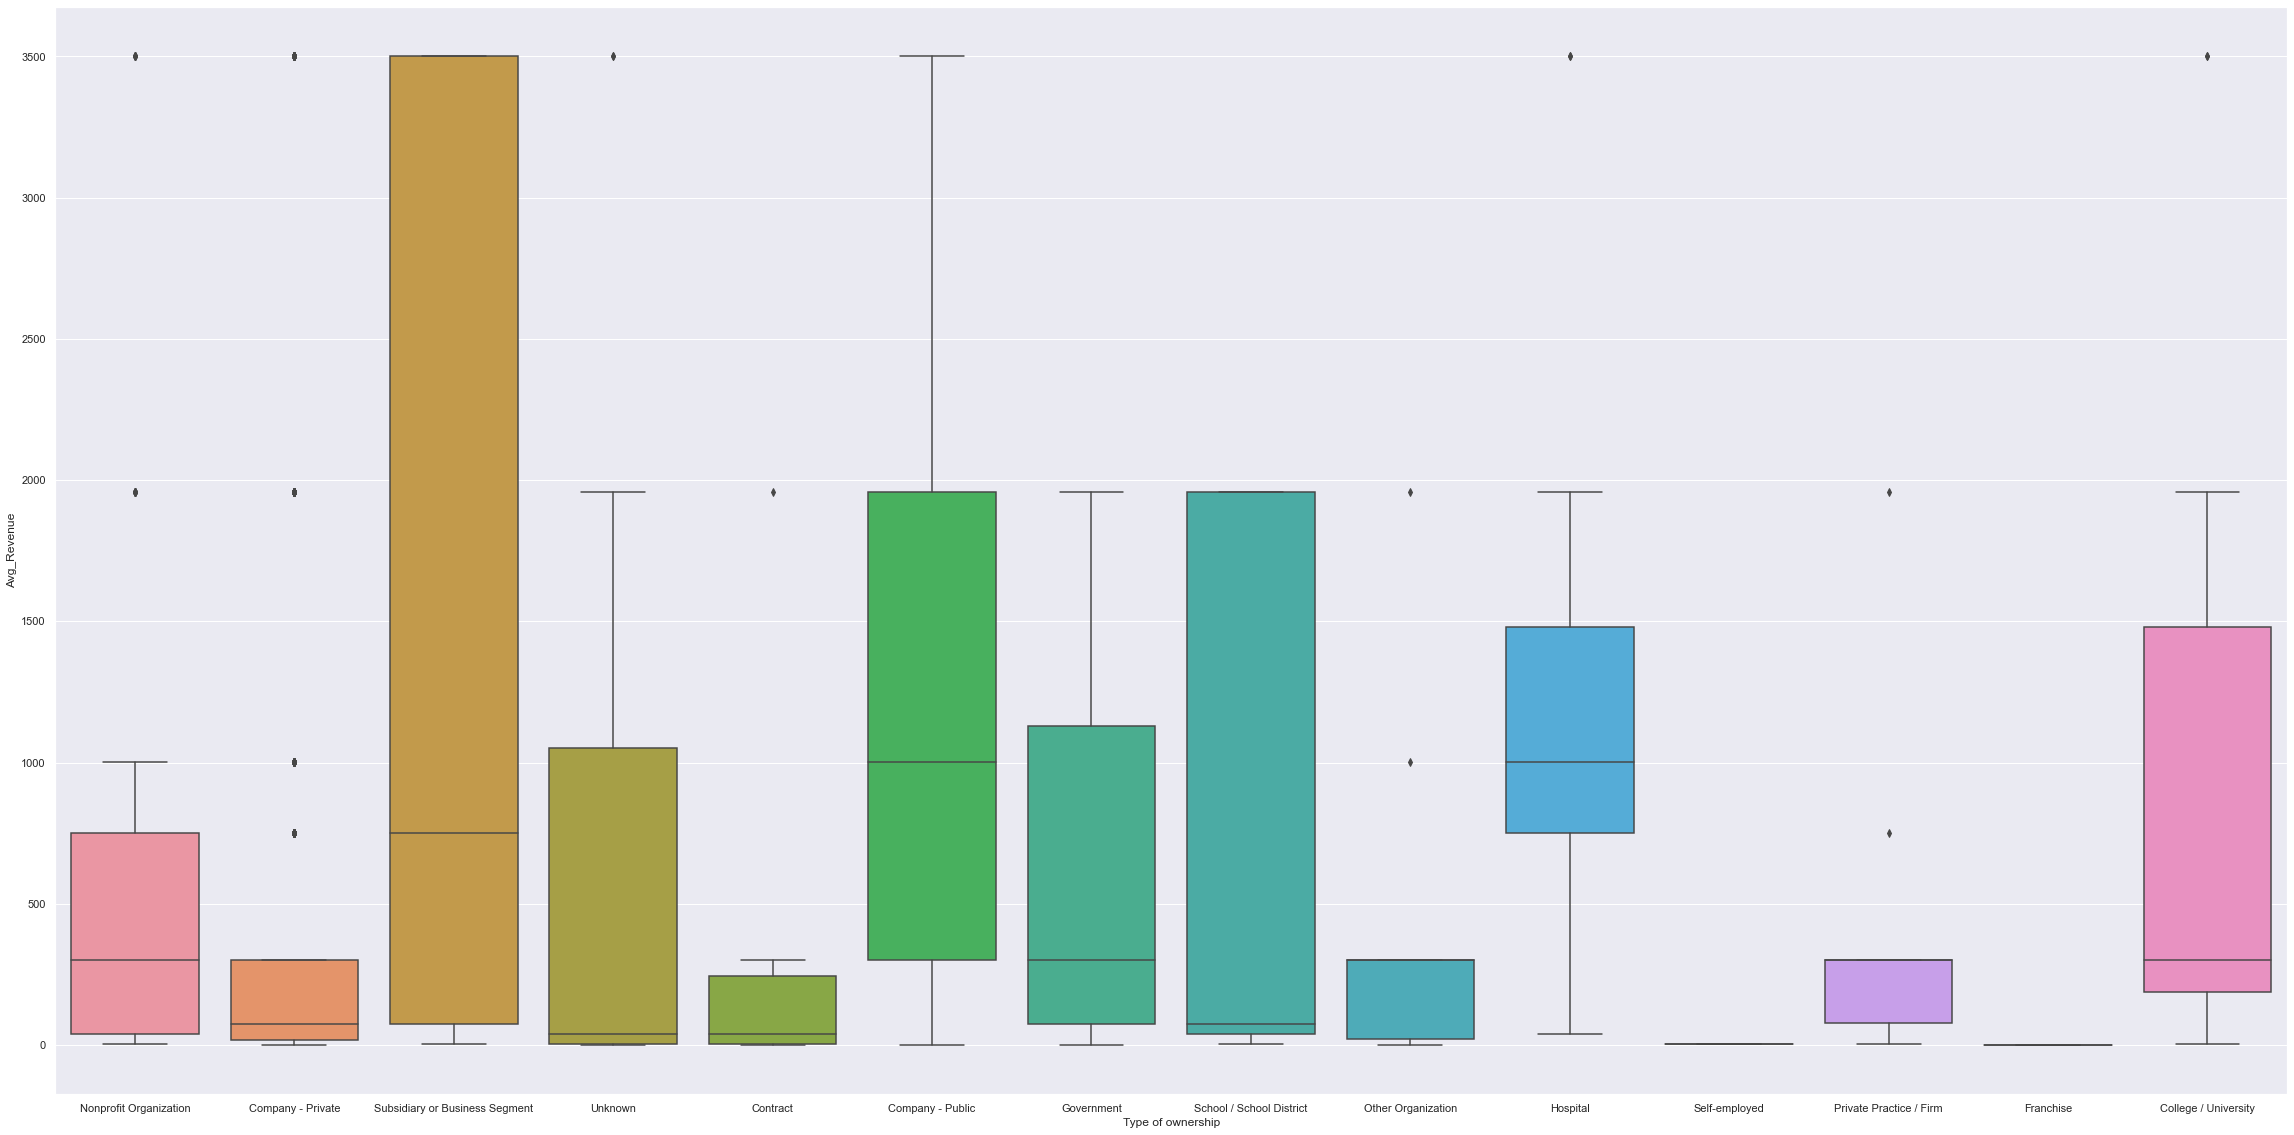

In [33]:
#box plot of types of ownership vs average revenue
sns.set(style = 'whitegrid')  
sns.set(rc={'figure.figsize':(40,20)})
sns.boxplot(x ="Type of ownership",y ="Avg_Revenue",data =df)

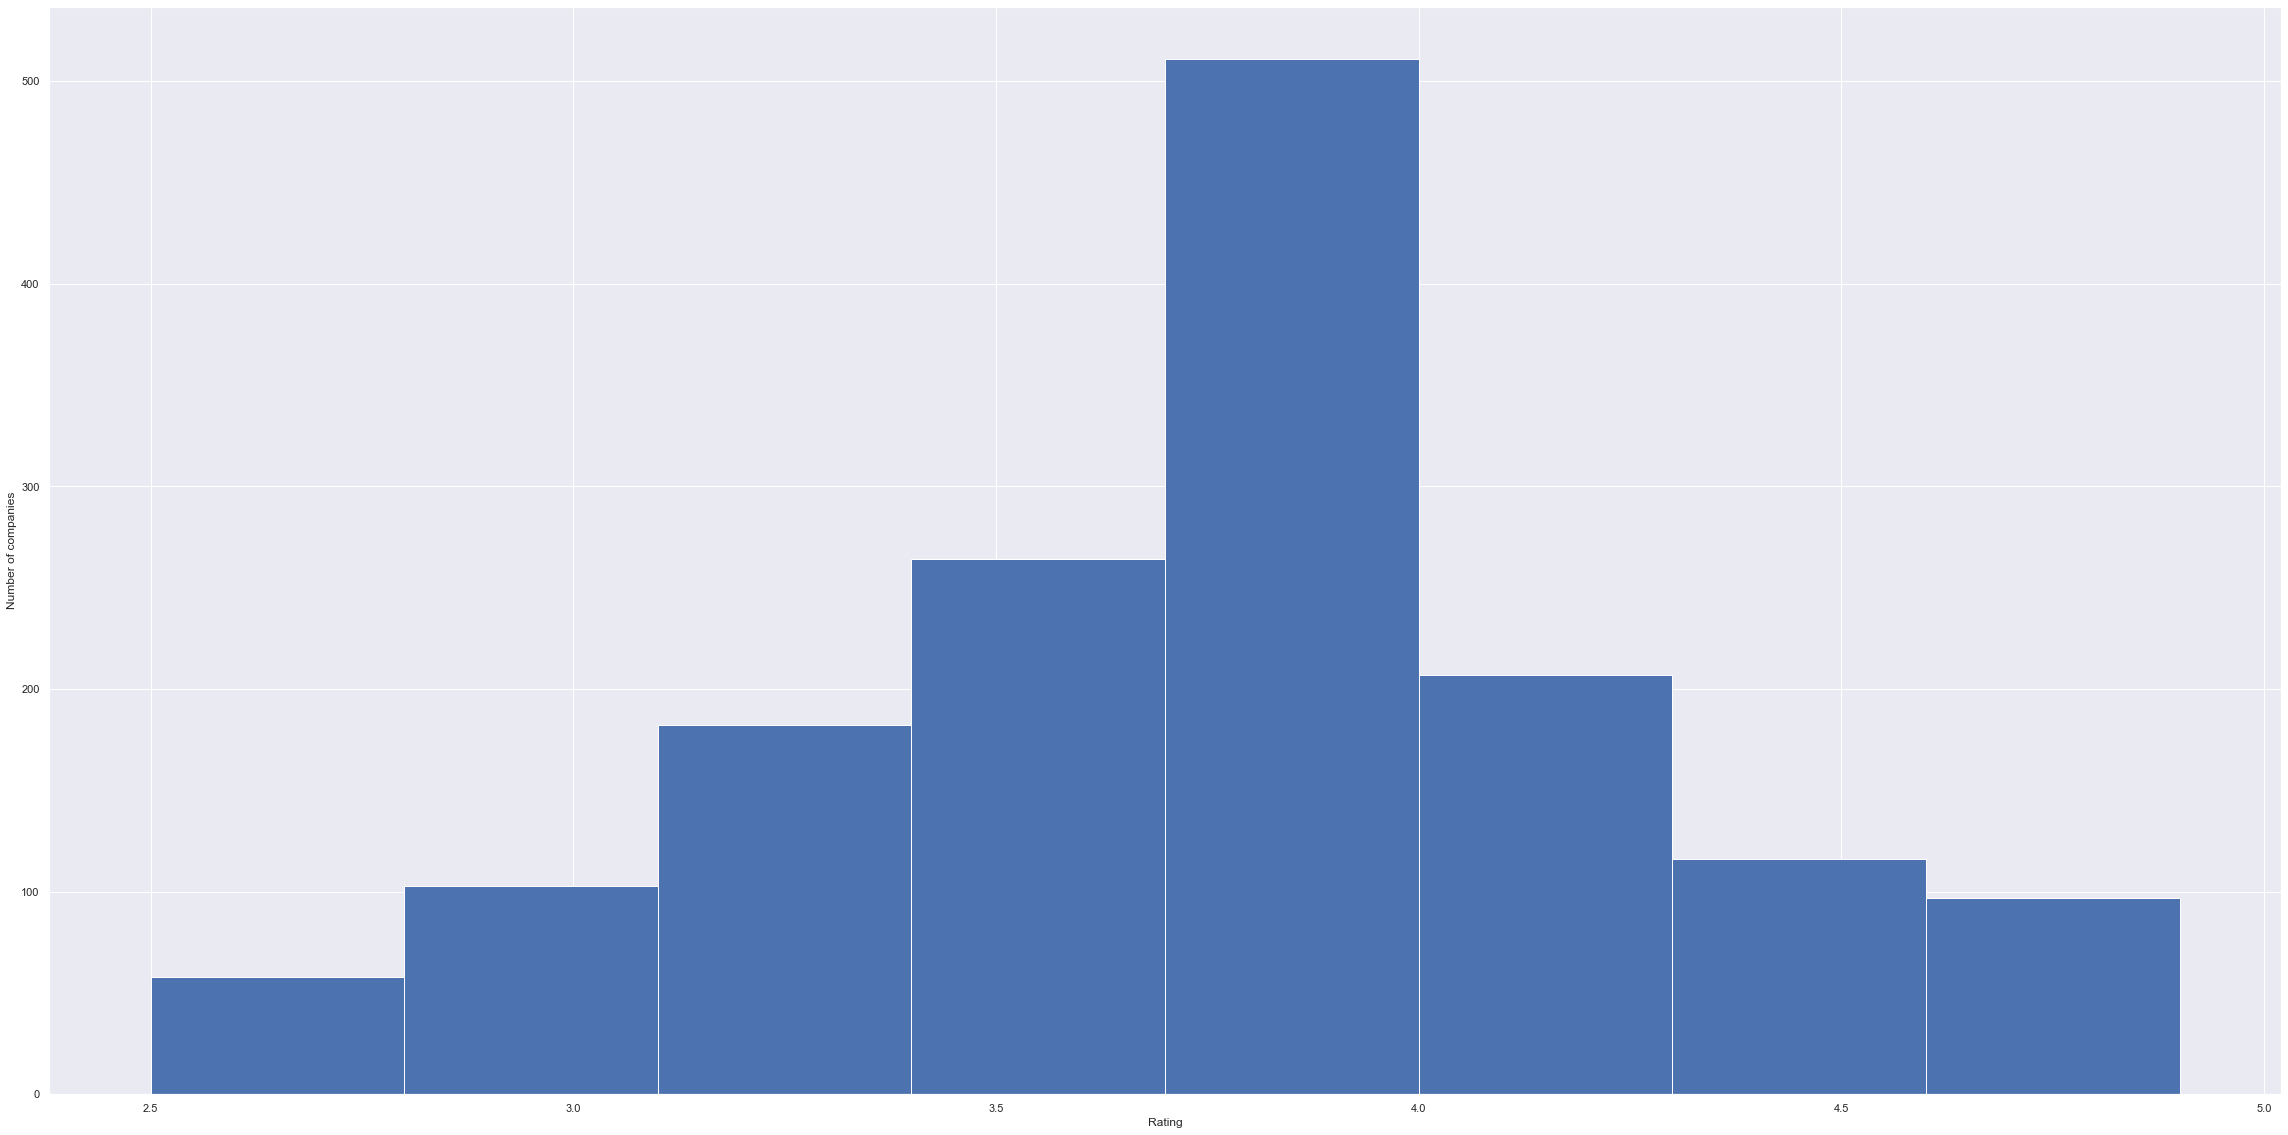

In [34]:
# Histogram of ratings and nummber of comapanies with that particular rating
bins_list=[2.5,2.8,3.1,3.4,3.7,4,4.3,4.6,4.9]
plt.xlabel('Rating')
plt.ylabel('Number of companies')
plt.hist(df['Rating'],bins=bins_list)
plt.show()

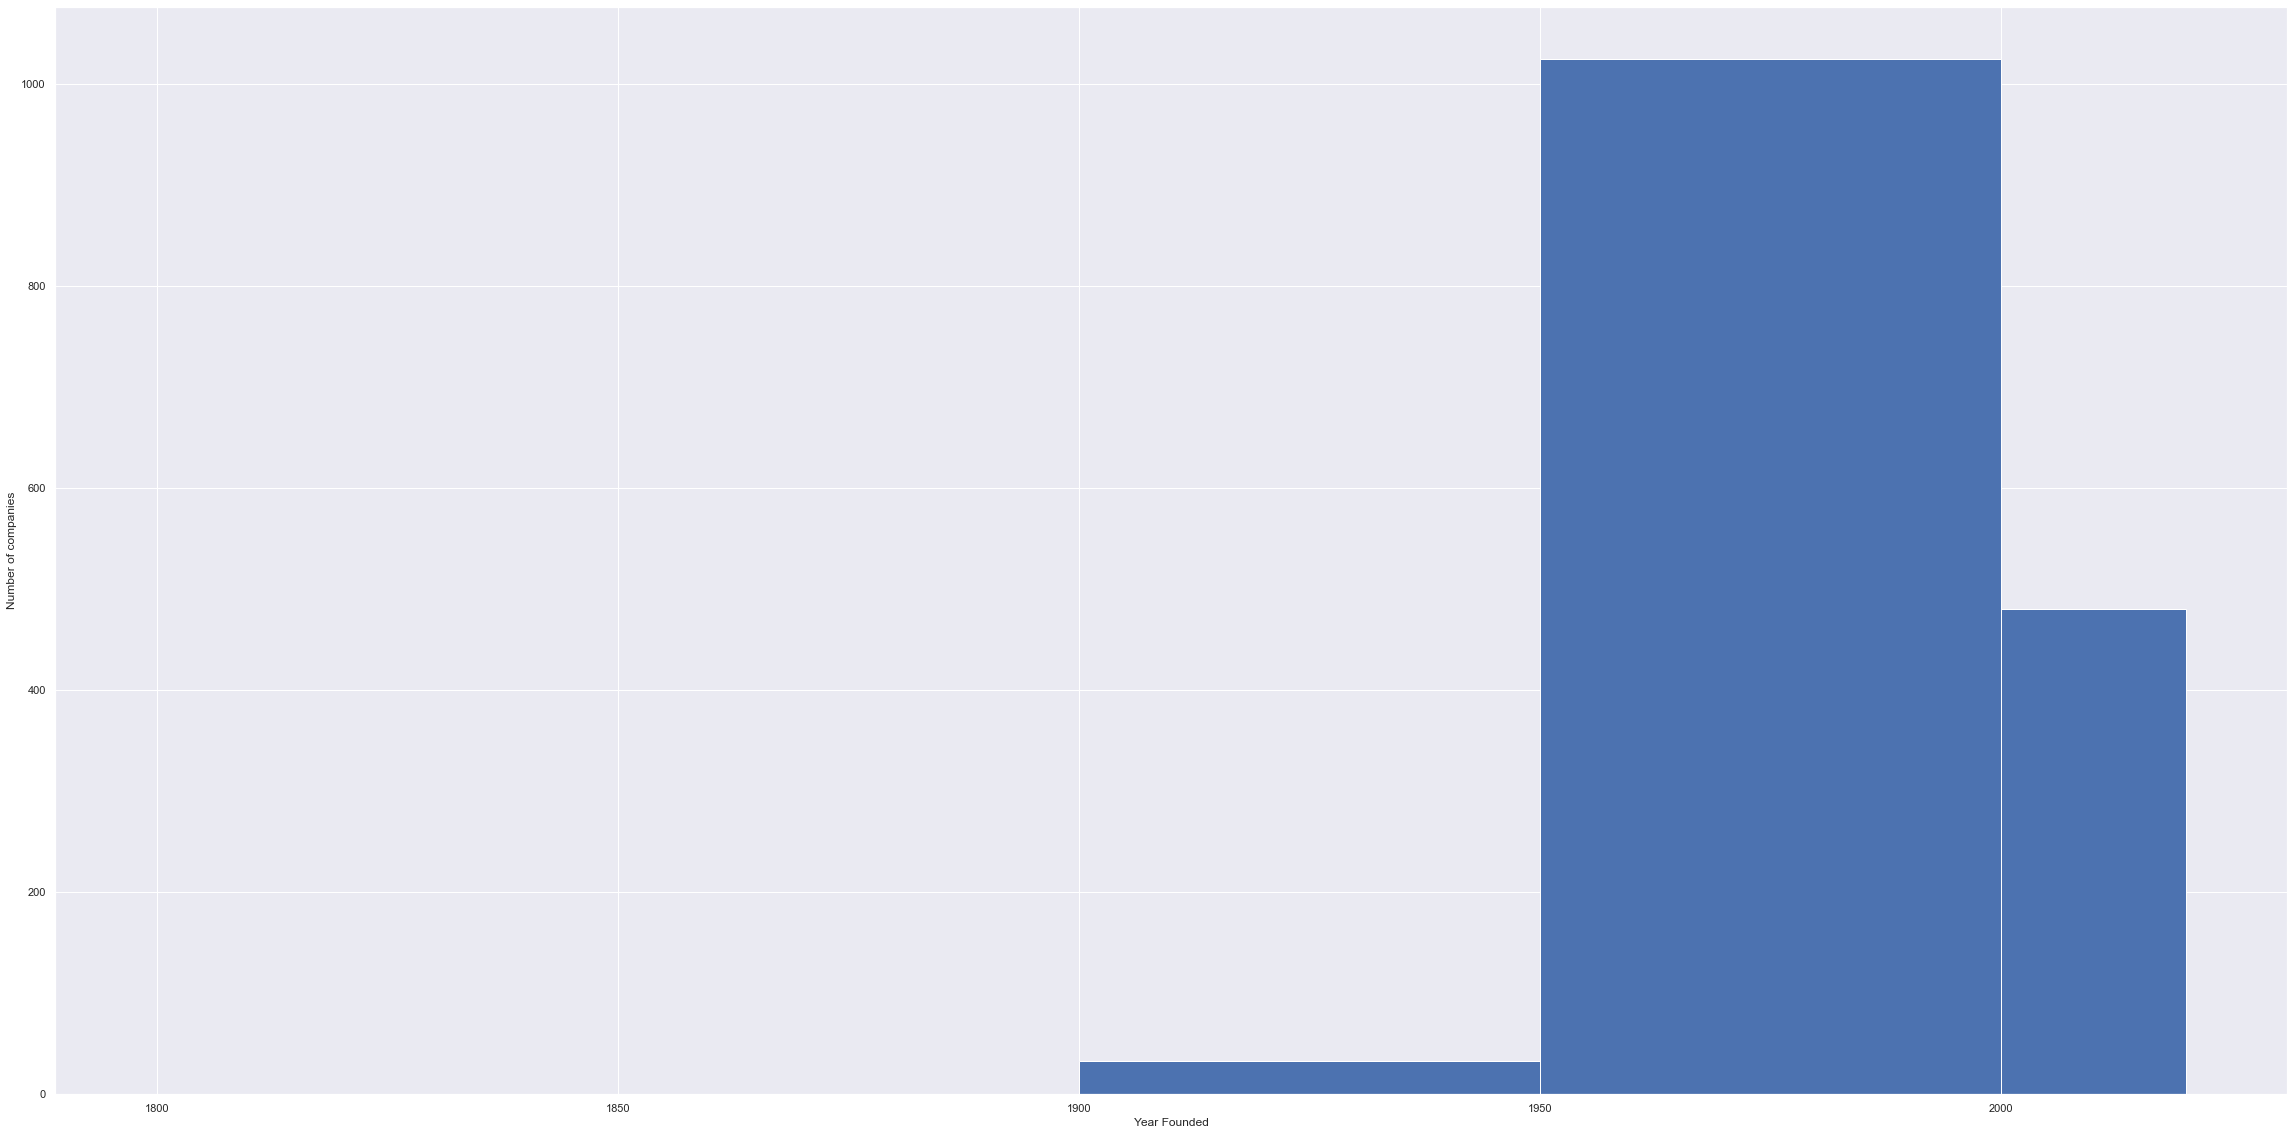

In [35]:
# Histogram of year in which companies were founded and nummber of comapanies started in that year
plt.xlabel('Year Founded')
plt.ylabel('Number of companies')
bin_edges=[1800,1850,1900,1950,2000,2020]
plt.hist(df['Founded'],bins=bin_edges)
plt.show()

# correlation 
### Correlation is a term that is a measure of the strength of a linear relationship between two quantitative variables.
### Positive correlation is a relationship between two variables in which both variables move in the same direction. This is when one variable increases while the other increases and visa versa.
### negative correlation is a relationship where one variable increases as the other decreases, and vice versa.
#### 1 indicates a perfect positive correlation.
#### -1 indicates a perfect negative correlation.
#### 0 indicates that there is no relationship between the different variables.

<ipython-input-36-1d0c77f0995a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Maximum Size'] = pd.to_numeric(df['Maximum Size'])
<ipython-input-36-1d0c77f0995a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Minimum Size'] = pd.to_numeric(df['Minimum Size'])
<ipython-input-36-1d0c77f0995a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

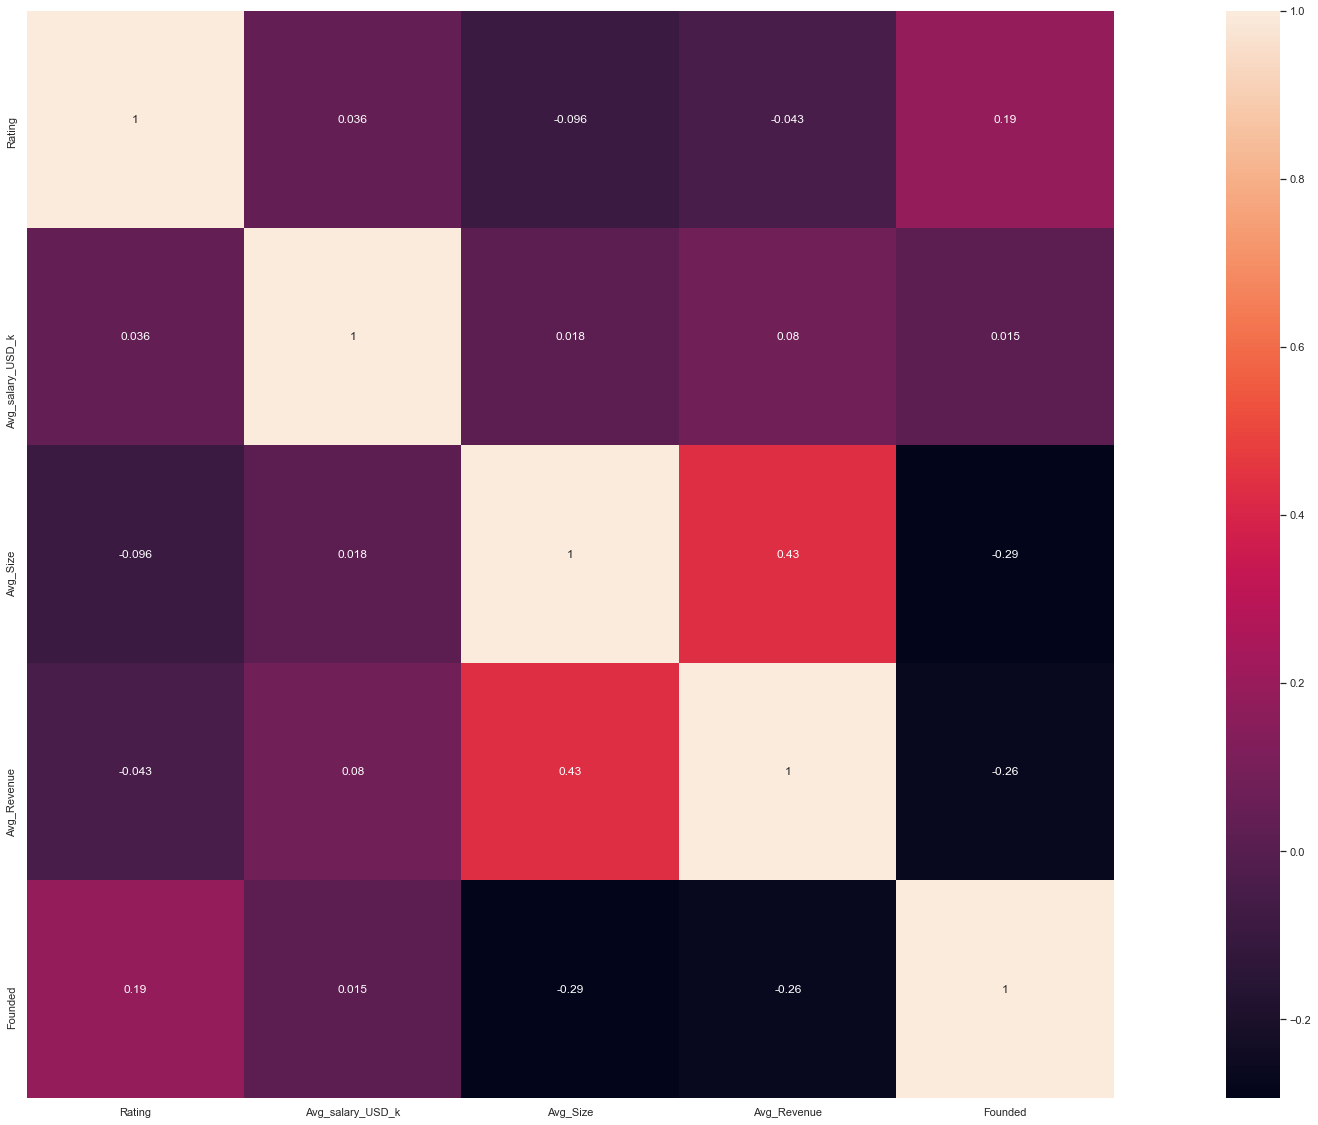

In [36]:
df['Maximum Size'] = pd.to_numeric(df['Maximum Size'])
df['Minimum Size'] = pd.to_numeric(df['Minimum Size'])
df["Avg_Size"] = (df["Maximum Size"] + df["Minimum Size"]) / 2
couple_columns=df[['Rating','Avg_salary_USD_k','Avg_Size','Avg_Revenue','Founded']]
couple_columns
cormat=couple_columns.corr()
sns.heatmap(cormat,square=True,annot=True)

# Hypothesis Testing

In [37]:
# Hypothesis Testing
# Hypothesis for the column 'Rating'
# H0- mu=xbar
# H1- mu!=xbar
#Let alpha be 0.05
from statsmodels.stats import weightstats as stests
xbar=df['Rating'].mean()
ztest ,pval = stests.ztest(df['Rating'].sample(n=1000), x2=None, value=xbar, alternative='two-sided')
print("P value:",float(pval))
if pval<0.05:
    print(pval,"<0.05")
    print("Reject null hypothesis.")
    print("Hence mu!=xbar")
else:
    print(pval,">0.05")
    print("Failed to reject null hypothesis.")
    print("Hence,both H0 and H1 are plausible.")

P value: 0.8749590583585303
0.8749590583585303 >0.05
Failed to reject null hypothesis.
Hence,both H0 and H1 are plausible.
